In [1]:
# A brief of problem statement

In [2]:
'''
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow
, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 
Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. 
Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and
between various cities.
'''

'\nFlight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow\n, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. \nHuh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. \nHere you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and\nbetween various cities.\n'

In [3]:
# A brief of dataset

In [4]:
'''
Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket
'''

'\nSize of training set: 10683 records\n\nSize of test set: 2671 records\n\nFEATURES:\nAirline: The name of the airline.\n\nDate_of_Journey: The date of the journey\n\nSource: The source from which the service begins.\n\nDestination: The destination where the service ends.\n\nRoute: The route taken by the flight to reach the destination.\n\nDep_Time: The time when the journey starts from the source.\n\nArrival_Time: Time of arrival at the destination.\n\nDuration: Total duration of the flight.\n\nTotal_Stops: Total stops between the source and destination.\n\nAdditional_Info: Additional information about the flight\n\nPrice: The price of the ticket\n'

In [5]:
# Importing required libraries

In [163]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [7]:
# Loading dataset

In [8]:
train_df=pd.read_excel("C://Users//acer//Desktop//1sem//python//flight ticket//Data_train.xlsx")

In [9]:
test_df=pd.read_excel("C://Users//acer//Desktop//1sem//python//flight ticket//Test_set.xlsx")

In [10]:
# Lets look at the shape of both dataset for future splitting

In [11]:
train_df.shape

(10683, 11)

In [12]:
test_df.shape

(2671, 10)

In [13]:
# Lets look at the training dataset

In [14]:
train_df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [15]:
# Lets have a look at the test dataset

In [16]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [17]:
# Lets concat both dataset so that we dont have to process the dataset individually

In [18]:
df=pd.concat([train_df,test_df],axis=0,sort=False)

In [19]:
# Lets look at the combined dataset from top

In [20]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


In [21]:
# a few rows from bottom

In [22]:
df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [23]:
# Listing al columns

In [24]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
# Lets change the case of column nmaes to lower for easy access

In [26]:
df.columns=map(str.lower,df.columns)

In [27]:
# Lets check whether we have done it successfully

In [28]:
df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price'],
      dtype='object')

In [29]:
# Lets see the datatype

In [30]:
df.dtypes

airline             object
date_of_journey     object
source              object
destination         object
route               object
dep_time            object
arrival_time        object
duration            object
total_stops         object
additional_info     object
price              float64
dtype: object

In [31]:
'''
Everything is object, this gives an indication that we need to encode all varibles
'''

'\nEverything is object, this gives an indication that we need to encode all varibles\n'

In [32]:
# Basic stats value 

In [33]:
df.describe()

,price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [34]:
# A brief summary of dataset

In [35]:
pd.DataFrame({"Total Missing":df.isna().sum(),"% Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,Total Missing,% Missing,DataType,Unique
airline,0,0.000000,object,12
date_of_journey,0,0.000000,object,44
source,0,0.000000,object,5
destination,0,0.000000,object,6
route,1,0.000075,object,132
dep_time,0,0.000000,object,223
arrival_time,0,0.000000,object,1451
duration,0,0.000000,object,374
total_stops,1,0.000075,object,5
additional_info,0,0.000000,object,10


In [36]:
'''
Dataset is quite clean as we dont have minimal null values(2). We can see null under price,these records belong to test data 
which we need to predict
'''

'\nDataset is quite clean as we dont have minimal null values(2). We can see null under price,these records belong to test data \nwhich we need to predict\n'

In [37]:
# Feature engineering

In [38]:
# Lets go columns by column for easy understanding

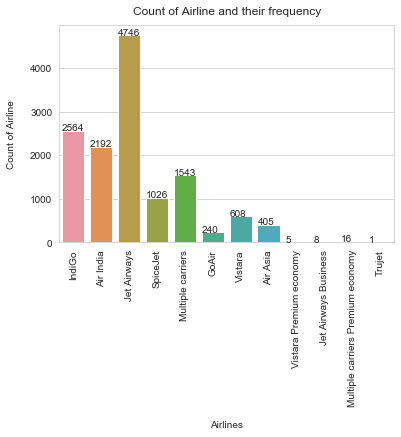

In [39]:
ax=sns.countplot(x=df['airline'],data=df)
plt.xticks(rotation=90)
plt.xlabel("Airlines", labelpad=14)
plt.ylabel("Count of Airline", labelpad=14)
plt.title("Count of Airline and their frequency", y=1.02)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(),p.get_height()))
plt.savefig("Airline count.png")

In [40]:
# Lets encode this variable 

In [41]:
le=LabelEncoder()
df["Airline"]=le.fit_transform(df["airline"])

In [42]:
# Lets see the coded airlines

In [43]:
pd.DataFrame({"Airline":df.airline.unique(),"Airline Code":df.Airline.unique()})

,Airline,Airline Code
0,IndiGo,3
1,Air India,1
2,Jet Airways,4
3,SpiceJet,8
4,Multiple carriers,6
5,GoAir,2
6,Vistara,10
7,Air Asia,0
8,Vistara Premium economy,11
9,Jet Airways Business,5


In [44]:
# Lets drop airline column

In [45]:
df.drop("airline",axis=1,inplace=True)

In [46]:
# Date of journey, lets see how it looks

In [47]:
df.date_of_journey.head(2)

0    24/03/2019
1     1/05/2019
Name: date_of_journey, dtype: object

In [48]:
# Lets extract meaning ful data from this variable

In [49]:
df[["Date","Month","Year"]]=df["date_of_journey"].str.split("/",expand=True)

In [50]:
# dropping this variable after extracting all required info

In [51]:
df.drop("date_of_journey",axis=1,inplace=True)

In [52]:
# Source, Lets see what it contains

In [53]:
df.source.head(3)

0    Banglore
1     Kolkata
2       Delhi
Name: source, dtype: object

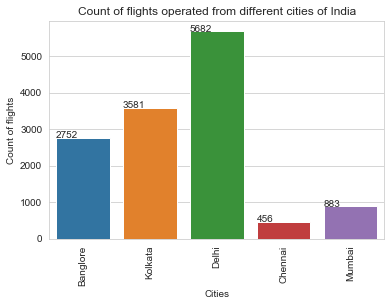

In [54]:
ax=sns.countplot(x=df["source"],data=df)
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("Count of flights")
plt.title("Count of flights operated from different cities of India")
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.savefig("Airline-cities.png")

In [55]:
'''
Most of flights take off from Delhi or can say most flights operate via Delhi
'''

'\nMost of flights take off from Delhi or can say most flights operate via Delhi\n'

In [56]:
# Lets encode this varible

In [57]:
le=LabelEncoder()
df["Source"]=le.fit_transform(df["source"])

In [58]:
# Lets see the coded values

In [59]:
pd.DataFrame({"CityName":df.source.unique(),"CityCode":df.Source.unique()})

,CityName,CityCode
0,Banglore,0
1,Kolkata,3
2,Delhi,2
3,Chennai,1
4,Mumbai,4


In [60]:
# Lets drop source variable

In [61]:
df.drop("source",axis=1,inplace=True)

In [62]:
# Destination: Lets see how it looks

In [63]:
df.destination.head(2)

0    New Delhi
1     Banglore
Name: destination, dtype: object

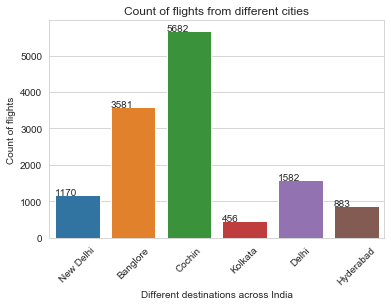

In [64]:
fig=sns.countplot(x=df["destination"],data=df)
plt.xticks(rotation=45)
plt.xlabel("Different destinations across India")
plt.ylabel("Count of flights")
plt.title("Count of flights from different cities")
for i in fig.patches:
    fig.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.savefig("Airline-destination.png")

In [65]:
# Lets Encode destinations

In [66]:
le=LabelEncoder()
df["Destination"]=le.fit_transform(df["destination"])

In [67]:
# Lets see the encoded values

In [68]:
pd.DataFrame({"Destination":df.destination.unique(),"DestinationCode":df.Destination.unique()})

,Destination,DestinationCode
0,New Delhi,5
1,Banglore,0
2,Cochin,1
3,Kolkata,4
4,Delhi,2
5,Hyderabad,3


In [69]:
# Lets drop destination column

In [70]:
df.drop("destination",axis=1,inplace=True)

In [71]:
# Route: Lets look at first few rows to get an idea how the values are and how to deal with it

In [72]:
df.route.head(2)

0                BLR → DEL
1    CCU → IXR → BBI → BLR
Name: route, dtype: object

In [73]:
df[["Route1","Route2","Route3","Route4","Route5","Route6"]]=df.route.str.split("→",expand=True)

In [74]:
# Lets drop route variable

In [75]:
df.drop("route",axis=1,inplace=True)

In [76]:
# dep time: a few rows from top

In [77]:
df.dep_time.head(2)

0    22:20
1    05:50
Name: dep_time, dtype: object

In [78]:
# we can use this method which will create 2 new variables as shown below which can be named as dep_hour and dep_minute
# df.dep_time.str.split(":",expand=True)

In [79]:
df["dep_time"]=df.dep_time.str.replace(":","")

In [80]:
# Arrival time

In [81]:
df.arrival_time.head(2)

0    01:10 22 Mar
1           13:15
Name: arrival_time, dtype: object

In [82]:
df[["Arrival_time","Unknown"]]=df.arrival_time.str.replace(":","").str.split(" ",expand=True,n=1)

In [83]:
df.drop(["arrival_time","Unknown"],axis=1,inplace=True)

In [84]:
# duration    

In [85]:
df.duration.head(5)

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: duration, dtype: object

In [86]:
# Lets do some processing to get the required information

In [87]:
df["dur"]=df.duration.str.replace("h",".")

In [88]:
df["dur"]=df.dur.str.replace("m","")

In [89]:
df["dur"]=df.dur.str.replace(" ","")

In [90]:
df["dur"]=df.dur.astype(float)

In [91]:
df["Duration_in_Hrs"]=np.round(df["dur"],2)

In [94]:
df.drop(["duration","dur"],axis=1,inplace=True)

In [ ]:
# Total_stops: A few rows from top

In [96]:
df.total_stops.head(3)

0    non-stop
1     2 stops
2     2 stops
Name: total_stops, dtype: object

In [97]:
df.total_stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [98]:
# Lets fill this null value with mode 

In [99]:
df.total_stops.fillna(df.total_stops.value_counts().sort_values(ascending=False).index[0],inplace=True)

In [100]:
# lets replace non stop with 0 stop 

In [101]:
df.total_stops.replace("non-stop","0 stop",inplace=True)

In [102]:
df[["Stops","Unknown"]]=df.total_stops.str.split(" ",expand=True)

In [103]:
df.drop(["total_stops","Unknown"],axis=1,inplace=True)

In [104]:
# Lets visualize

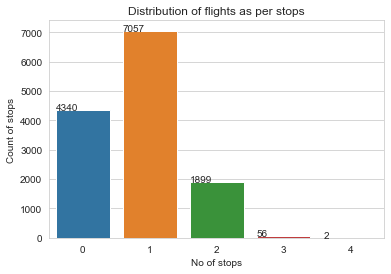

In [105]:
fig=sns.countplot(x="Stops",data=df)
plt.xlabel("No of stops")
plt.ylabel("Count of stops")
plt.title("Distribution of flights as per stops")
for i in fig.patches:
    fig.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.savefig("Airline-stops.png")

In [106]:
# Additional info

In [107]:
df.additional_info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [108]:
# No info and No Info are same lets make it one 

In [109]:
df.additional_info.replace("No Info","No info",inplace=True)

In [110]:
# Lets visualize

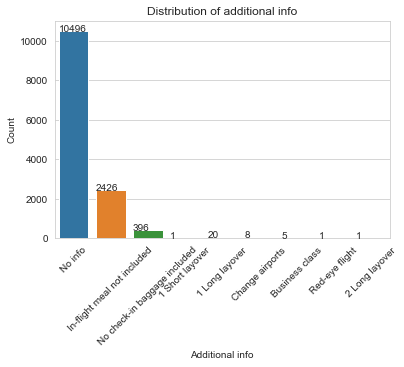

In [111]:
fig=sns.countplot(x="additional_info",data=df)
plt.xticks(rotation=45)
plt.xlabel("Additional info")
plt.ylabel("Count")
plt.title("Distribution of additional info")
for i in fig.patches:
    fig.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.savefig("Airline-additional info.png")

In [112]:
# Lets encode this variable

In [113]:
le=LabelEncoder()
df["Additional_info"]=le.fit_transform(df["additional_info"])

In [114]:
# Lets see the encoded values

In [115]:
pd.DataFrame({"Info":df.additional_info.unique(),"InfoCode":df.Additional_info.unique()})

,Info,InfoCode
0,No info,7
1,In-flight meal not included,5
2,No check-in baggage included,6
3,1 Short layover,1
4,1 Long layover,0
5,Change airports,4
6,Business class,3
7,Red-eye flight,8
8,2 Long layover,2


In [116]:
df.drop("additional_info",axis=1,inplace=True)

In [117]:
df[df.Route1.isnull()]

,dep_time,price,Airline,Date,Month,Year,Source,Destination,Route1,Route2,Route3,Route4,Route5,Route6,Arrival_time,Duration_in_Hrs,Stops,Additional_info
9039,0945,7480.0,1,6,05,2019,2,1,NaN,NaN,NaN,NaN,NaN,NaN,0925,23.4,1,7


In [118]:
df[df.Route2.isnull()]

,dep_time,price,Airline,Date,Month,Year,Source,Destination,Route1,Route2,Route3,Route4,Route5,Route6,Arrival_time,Duration_in_Hrs,Stops,Additional_info
9039,0945,7480.0,1,6,05,2019,2,1,NaN,NaN,NaN,NaN,NaN,NaN,0925,23.4,1,7


In [119]:
# Lets drop this row index no 9039 as it has all values under route as null

In [120]:
df.drop(9039,inplace=True)

In [121]:
# Lets fill all na values with 0 in routes

In [122]:
df["Route3"].fillna(0,inplace=True)
df["Route4"].fillna(0,inplace=True)
df["Route5"].fillna(0,inplace=True)
df["Route6"].fillna(0,inplace=True)

In [123]:
# Lets replace all 0 with str "None"

In [124]:
df["Route3"].replace(0,"None",inplace=True)
df["Route4"].replace(0,"None",inplace=True)
df["Route5"].replace(0,"None",inplace=True)
df["Route6"].replace(0,"None",inplace=True)

In [125]:
# Lets encode all route 

In [126]:
le=LabelEncoder()
df["Route1"]=le.fit_transform(df["Route1"])
df["Route2"]=le.fit_transform(df["Route2"])
df["Route3"]=le.fit_transform(df["Route3"])
df["Route4"]=le.fit_transform(df["Route4"])
df["Route5"]=le.fit_transform(df["Route5"])
df["Route6"]=le.fit_transform(df["Route6"])

In [127]:
# Till here we have encoded all columns, lets see the datatype of all columns

In [128]:
df.dtypes

dep_time            object
price              float64
Airline              int32
Date                object
Month               object
Year                object
Source               int32
Destination          int32
Route1               int32
Route2               int32
Route3               int32
Route4               int32
Route5               int32
Route6               int32
Arrival_time        object
Duration_in_Hrs    float64
Stops               object
Additional_info      int32
dtype: object

In [129]:
# Lets change the datatype of all columns to int or float

In [130]:
df["dep_time"]=df.dep_time.astype(int)
df["Date"]=df.Date.astype(int)
df["Month"]=df.Month.astype(int)
df["Year"]=df.Year.astype(int)
df["Arrival_time"]=df.Arrival_time.astype(int)
df["Stops"]=df.Stops.astype(int)

In [131]:
# Lets look at the datatypes 

In [132]:
df.dtypes

dep_time             int32
price              float64
Airline              int32
Date                 int32
Month                int32
Year                 int32
Source               int32
Destination          int32
Route1               int32
Route2               int32
Route3               int32
Route4               int32
Route5               int32
Route6               int32
Arrival_time         int32
Duration_in_Hrs    float64
Stops                int32
Additional_info      int32
dtype: object

In [133]:
# Lets look at the final dataset

In [134]:
df.head(5)

,dep_time,price,Airline,Date,Month,Year,Source,Destination,Route1,Route2,Route3,Route4,Route5,Route6,Arrival_time,Duration_in_Hrs,Stops,Additional_info
0,2220,3897.0,3,24,3,2019,0,5,0,13,30,13,5,1,110,2.50,0,7
1,550,7662.0,1,1,5,2019,3,0,2,25,1,3,5,1,1315,7.25,2,7
2,925,13882.0,4,9,6,2019,2,1,3,32,4,5,5,1,425,19.00,2,7
3,1805,6218.0,3,12,5,2019,3,0,2,34,3,13,5,1,2330,5.25,1,7
4,1650,13302.0,3,1,3,2019,0,5,0,34,8,13,5,1,2135,4.45,1,7


In [ ]:
# Lets build model for predicting price

In [135]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
# As we have already taken shape of train and test dataset now we will use it for splitting

In [140]:
df_train=df[:10682]
df_test=df[10682:]

In [142]:
df_train.head(3)

,dep_time,price,Airline,Date,Month,Year,Source,Destination,Route1,Route2,Route3,Route4,Route5,Route6,Arrival_time,Duration_in_Hrs,Stops,Additional_info
0,2220,3897.0,3,24,3,2019,0,5,0,13,30,13,5,1,110,2.50,0,7
1,550,7662.0,1,1,5,2019,3,0,2,25,1,3,5,1,1315,7.25,2,7
2,925,13882.0,4,9,6,2019,2,1,3,32,4,5,5,1,425,19.00,2,7


In [ ]:
# Lets drop the target variable price

In [143]:
y=df_train["price"]
x=df_train.drop("price",axis=1)

In [ ]:
# splitting dataset using train test split function

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Lets see the shape of splitted datasset

In [146]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (7477, 17)
shape of y_train: (7477,)
shape of x_test: (3205, 17)
shape of y_test: (3205,)


In [ ]:
# Lets see which variables are useful for predicting price

In [147]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=42))

In [ ]:
# fitting our training dataset to find out best features

In [148]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
# Lets see best features

In [149]:
model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Here False indicates that varible is not important in predicting target, Lets find out which variable is False

In [150]:
imp_feats=x_train.columns[(model.get_support())]
display(imp_feats)

Index(['dep_time', 'Airline', 'Date', 'Month', 'Source', 'Destination',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6',
       'Arrival_time', 'Duration_in_Hrs', 'Stops', 'Additional_info'],
      dtype='object')

In [ ]:
# Year varible is missing from above selected feats, lets drop this varible from train and test

In [151]:
x_train=x_train.drop(['Year'],axis=1)
x_test=x_test.drop(['Year'],axis=1)

In [ ]:
# Lets use Random forest regressor for building model, we will also tune hyperparameters
# for which we will be using randomizedsearch cv,we can also use gridsearchcv

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [154]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [155]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [156]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
# Lets see which one is best for predicting target 

In [158]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   6.4s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.9s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=  11.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.1s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  13.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  13.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.6s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  12.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  12.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  12.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.9s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   7.1s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 36.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
# Lets predict

In [159]:
prediction=rf_random.predict(x_test)

In [ ]:
# Lets visualise the diffrence between actual and predicted values,ie residual

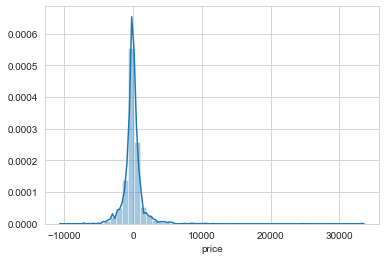

In [160]:
import seaborn as sns

sns.distplot(y_test-prediction)

In [ ]:
# Using scatter plot for visualization

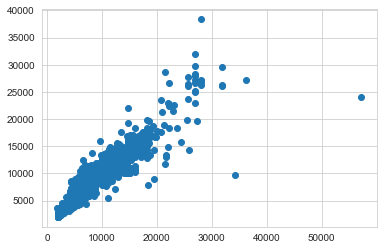

In [161]:
plt.scatter(y_test,prediction)

In [ ]:
# Lets see the accuracy

In [168]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
(r2_score(y_test,prediction)*100)

mean abs error: 812.6700173736901
mean sq error: 2275652.1588350204
root mean sq error: 1508.526485957413


88.84534900909101

In [169]:
import statsmodels.formula.api as sm

In [170]:
model=sm.ols(formula=(y_test,x_test) ,data=df_train)
fitted=model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:45:21   Log-Likelihood:                -30310.
No. Observations:                3205   AIC:                         6.065e+04
Df Residuals:                    3189   BIC:                         6.075e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
dep_time            0.1856      0.098      1.889      0.059      -0.007       0.378
Airline           151.4639     23.949      6.324      0.000     104.507     198.421
Date              -87.3919      6.524    -13.396      0.000    -100.183     -74.601
Month            -318.5136     52.098     -6.114      0.000    -420.662    -216.365
Source           -193.8970     59.075     -3.282      0.001    -309.726     -78.068
Destination       438.1269     54.657      8.016      0.000     330.960     545.294
Route1           -285.9326     61.198     -4.672      0.000    -405.924    -165.942
Route2            -97.5651      7.519    -12.975      0.000    -112.308     -82.822
Route3           -171.1319     22.869     -7.483      0.000    -215.971    -126.293
Route4           -155.8281     72.483     -2.150      0.032    -297.945     -13.711
Route5            167.7375    344.156      0.487      0.626    -507.052     842.527
Route6           1.321e+04   3060.782      4.315      0.000    7205.985    1.92e+04
Arrival_time       -0.0255      0.081     -0.314      0.754      -0.185       0.134
Duration_in_Hrs    32.2218     10.118      3.185      0.001      12.384      52.060
Stops            1776.9323    566.881      3.135      0.002     665.444    2888.421
Additional_info   109.3131     66.966      1.632      0.103     -21.988     240.614
==============================================================================
Omnibus:                     1712.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45845.280
Skew:                           1.997   Prob(JB):                         0.00
Kurtosis:                      21.093   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Lets fit this model on our actual test data

In [ ]:
# Lets drop price col

In [180]:
df_test.drop("price",axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [184]:
df_test.drop("Year",axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [186]:
y_pred=rf_random.predict(df_test)

In [187]:
final_prediction=pd.DataFrame({"Prediction":y_pred})

In [189]:
final_prediction.Prediction.dtype

dtype('float64')

In [194]:
final_prediction.Prediction=np.round(final_prediction.Prediction,0)

In [197]:
final_prediction.Prediction=final_prediction.Prediction.astype(int)

In [198]:
final_prediction.to_excel("finalsubmission_flight.xlsx", index=False)